# <center><a href='https://colab.research.google.com/github/cpge-itc/itc1/blob/main/3_algorithm_analysis/1_complexity/tp2/tp_complexity2.ipynb'>TP 2 : Complexité de la dichotomie et d'algorithmes de tri <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

Dans ce TP, on revoit certains algorithmes vus au semestre en déterminant leur complexité. On compare ensuite cette complexité (théorique) avec le temps d'exécution constaté.

## Appartenance d'un élément à une liste

**Exercice** : 
1. Écrire une fonction `appartient(e, L)` qui retourne `True` si l'élément `e` appartient à la liste `L`, `False` sinon.
2. Quelle est la complexité de `appartient`, pour une liste de taille $n$ ?
3. Vérifier cette complexité en utilisant la fonction `benchmark_appartient` ci-dessous : Ecrire, par exemple, `benchmark_appartient(10000, appartient)` pour afficher le temps d'exécution pour des listes allant jusqu'à la taille `n` (on testera par exemple pour `n = 10000`).

In [98]:
import matplotlib.pyplot as plt
import random, time

def benchmark_appartient(n, f):
    times, X = [], []
    n_sample = 200
    for i in range(1, n, n//10):
        t = 0
        for _ in range(n_sample):
            L = sorted([random.random() for _ in range(i)])
            start = time.time()
            f(random.random(), L)
            t += time.time() - start
        times.append(t/n_sample)
        X.append(i)
    plt.plot(X, times, label=f.__name__)
    plt.legend()
    plt.xlabel("Nombre d'éléments dans la liste")
    plt.ylabel("Temps d'exécution (en secondes)")
    plt.show()

**Exercice** : 
1. Compléter la fonction `dichotomie` ci-dessous qui prend en argument une liste triée et un élément et qui retourne `True` si l'élément appartient à la liste, `False` sinon. On pourra revoir le TP sur la dichotomie si besoin.
2. Montrer que la boucle `while` de `dichotomie(e, L)` s'exécute au plus $log(n)$ fois, où $n$ est la taille de `L`.
*Indice* : Au bout de $k$ passages dans le `while`, que vaut $j - i$ (c'est-à-dire la taille de l'intervalle $[i, j]$)?
3. Vérifier cette complexité en appelant `benchmark_appartient(50000, dichotomie)` (ou des plus petites valeurs de `n` si cela prend trop de temps).

In [99]:
def dichotomie(e, L):
    i, j = 0, len(L) - 1  # i et j sont les indices de L entre lesquels on cherche e
    while ...: # tant qu'il reste au moins 1 élément entre les indices i et j
        m = ... # milieu de i et j
        if e < L[m]:
            ... # regarder dans la partie gauche
        elif e > L[m]:
            ... # regarder dans la partie droite
        else:
            ... # on a trouvé e
    ... # e n'a pas été trouvé


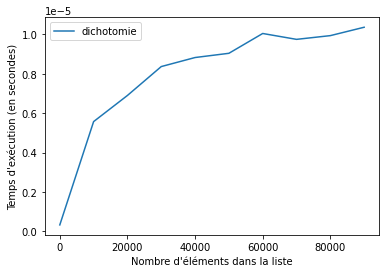

In [100]:
def dichotomie(e, L):
    i, j = 0, len(L) - 1  # i et j sont les indices de L entre lesquels on cherche e
    while i <= j: # tant qu'il reste au moins 1 élément entre les indices i et j
        m = (i + j)//2 # milieu de i et j
        if e < L[m]:
            j = m - 1 # regarder dans la partie gauche
        elif e > L[m]:
            i = m + 1 # regarder dans la partie droite
        else:
            return True # on a trouvé e
    return False # e n'a pas été trouvé

benchmark_appartient(50000, dichotomie)

## Tris

### Tri par insertion

Le tri par insertion consiste à trier progressivement la liste `L`, de gauche à droite. Plus précisément, à l'étape $i$, les $i$ premiers de `L` sont triés et on fait en sorte d'insérer le $i+1$ème élément `L[i]` au bon endroit pour que les $i + 1$ premiers éléments soient triés.  
Voici les étapes du tri par insertion pour la liste `L = [5, 1, -4, 2, -8, 7]` :
- `i = 0` : on insère `L[0] = 5` de façon à ce que le 1er élément de `L` soit trié (il n'y a rien à faire : un élément seul est toujours trié). `L` vaut [**5**, 1, -4, 2, -8, 7]  (on met en gras la partie de `L` déjà triée).  
- `i = 1` : on insère `L[1] = 1` au bon endroit, ce qui donne [**1, 5**, -4, 2, -8, 7]
- `i = 2` : on insère `L[2] = -4` au bon endroit, ce qui donne [**-4, 1, 5**, 2, -8, 7]
- `i = 3` : on insère `L[3] = 2` au bon endroit, ce qui donne [**-4, 1, 2, 5**, -8, 7]
- `i = 4` : on insère `L[4] = -8` au bon endroit, ce qui donne [**-8, -4, 1, 2, 5**, 7]
- `i = 5` : on insère `L[5] = 7` au bon endroit, ce qui donne [**-8, -4, 1, 2, 5, 7**]  

On a terminé, et la liste est bien triée.  

**Exercice** : Ecrire une fonction `position` telle que, si `L` est une liste, `i` un indice de `L` et `e` une valeur, `position(L, i, e)` renvoie le plus petit indice `j < i` tel que `L[j] > e`. S'il n'existe pas de tel indice `j`, on renverra `i`.  
Exemple : `position([1, 5, -4, 2, -8, 7], 2, -4)` doit renvoyer `0`,  `position([-8, -4, 1, 2, 5, 7], 5, 7)` doit renvoyer `5`.  
On pourra compléter le code suivant :
```python
def position(L, i, e):
    for j in range(i):
        if ...:
            return ...
    return i

print(position([1, 5, -4, 2, -8, 7], 2, -4)) # test
print(position([-8, -4, 1, 2, 5, 7], 5, 7)) # test
```

**Exercice** : Écrire une fonction `decaler` telle que `decaler(L, i, j)` décale les éléments de la liste `L` d'une position vers la droite. Ainsi, la valeur de `L[i]` doit être mise dans `L[i + 1]`, `L[i + 1]` dans `L[i + 2]`, ..., `L[j - 1]` doit être mise dans `L[j]`.  
Par exemple, après les instructions `L = [1, 3, 6, 9, 17]` et `decaler(L, 1, 3)`, `L` doit contenir `[1, 3, 3, 6, 17]` (`L[i]` n'est pas modifié).

**Exercice** : En utilisant `position` et `decaler`, écrire une fonction `tri_insertion` qui trie une liste en utilisant le tri par insertion. On pourra compléter le code suivant :
```python
def tri_insertion(L):
    for i in range(len(L)):
        p = ...
        decaler(...)
        ... # mettre l'ancienne valeur de L[i] dans L[p]
```

**Exercice** : 
1. Montrer que la complexité de `tri_insertion(L)` est O($n^2$) où $n$ est la taille de `L`.
2. Vérifier avec `benchmark_tri(2000, tri_insertion)` où `benchmark_tri` est la fonction ci-dessous.

In [132]:
import matplotlib.pyplot as plt
import random, time

def benchmark_tri(n, *functions):
    times, X = [], []
    n_sample = 10
    for f in functions:
        for i in range(1, n, n//10):
            t = 0
            for _ in range(n_sample):
                start = time.time()
                f([random.random() for _ in range(i)])
                t += time.time() - start
            times.append(t/n_sample)
            X.append(i)
        plt.plot(X, times, label=f.__name__)
        plt.legend()
        plt.xlabel("Nombre d'éléments dans la liste")
        plt.ylabel("Temps d'exécution (en secondes)")
    plt.show()

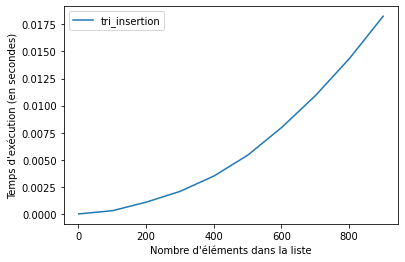

In [114]:
def position(L, i, e):
    for j in range(i):
        if L[j] > e:
            return j
    return i

def decaler(L, i, j):
    for k in range(j, i, -1):
        L[k] = L[k - 1]

def tri_insertion(L):
    for i in range(len(L)):
        p = position(L, i, L[i])
        Li = L[i]
        decaler(L, p, i)
        L[p] = Li

**Exercice** : Vérifier graphiquement que le `tri_fusion(L)` ci-dessous est en complexité O($n\log(n)$), où $n$ est la taille de `L`.

In [115]:
def division(L):
    L1, L2 = [], []
    for i in range(len(L)):
        if i < len(L)//2:
            L1.append(L[i])
        else:
            L2.append(L[i])
    return L1, L2

def fusion(L1, L2):
    L = []
    i, j = 0, 0
    while i < len(L1) and j < len(L2):
        if L1[i] < L2[j]:
            L.append(L1[i])
            i += 1
        else:
            L.append(L2[j])
            j += 1
    L += L1[i:]
    L += L2[j:]
    return L

def tri_fusion(L):
    if len(L) <= 1:
        return L
    L1, L2 = division(L)
    return fusion(tri_fusion(L1), tri_fusion(L2))